# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}{city}"  
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yagry
City not found. Skipping...
Processing Record 2 of Set 1 | tanjung pandan
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | gadzhiyevo
Processing Record 5 of Set 1 | san andres ixtlan
Processing Record 6 of Set 1 | isafjordur
Processing Record 7 of Set 1 | sirjan
Processing Record 8 of Set 1 | howrah
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | labrador city
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | lazaro cardenas
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | luganville
Processing Record 20 of Set 1 | yuzhno-kurilsk
Processing Record 21 of Set 

Processing Record 38 of Set 4 | hammerfest
Processing Record 39 of Set 4 | port isabel
Processing Record 40 of Set 4 | sisimiut
Processing Record 41 of Set 4 | astrakhan
Processing Record 42 of Set 4 | tralee
Processing Record 43 of Set 4 | stanley
Processing Record 44 of Set 4 | chonchi
Processing Record 45 of Set 4 | murehwa
Processing Record 46 of Set 4 | afaahiti
Processing Record 47 of Set 4 | kodinsk
Processing Record 48 of Set 4 | rio san juan
Processing Record 49 of Set 4 | la sierpe
Processing Record 0 of Set 5 | trat
Processing Record 1 of Set 5 | masuguru
Processing Record 2 of Set 5 | aasiaat
Processing Record 3 of Set 5 | tuzha
Processing Record 4 of Set 5 | veraval
Processing Record 5 of Set 5 | ilulissat
Processing Record 6 of Set 5 | bo rai
Processing Record 7 of Set 5 | ustrzyki dolne
Processing Record 8 of Set 5 | olyokminsk
Processing Record 9 of Set 5 | paloncha
Processing Record 10 of Set 5 | matadi
Processing Record 11 of Set 5 | chawinda
Processing Record 12 of S

Processing Record 33 of Set 8 | jalai nur
Processing Record 34 of Set 8 | cromwell
Processing Record 35 of Set 8 | dapa
Processing Record 36 of Set 8 | plettenberg bay
Processing Record 37 of Set 8 | ndele
Processing Record 38 of Set 8 | kadnikov
Processing Record 39 of Set 8 | espera feliz
Processing Record 40 of Set 8 | kalmunai
Processing Record 41 of Set 8 | klyuchi
Processing Record 42 of Set 8 | magadan
Processing Record 43 of Set 8 | glendale
Processing Record 44 of Set 8 | inhambane
Processing Record 45 of Set 8 | lospalos
Processing Record 46 of Set 8 | west bay
Processing Record 47 of Set 8 | lebu
Processing Record 48 of Set 8 | kayangel
Processing Record 49 of Set 8 | uglegorsk
Processing Record 0 of Set 9 | casper
Processing Record 1 of Set 9 | al mijlad
Processing Record 2 of Set 9 | sangin
Processing Record 3 of Set 9 | ust-tsilma
Processing Record 4 of Set 9 | tazacorte
Processing Record 5 of Set 9 | shache
Processing Record 6 of Set 9 | vernon
Processing Record 7 of Set

Processing Record 25 of Set 12 | bertioga
Processing Record 26 of Set 12 | taourirt
Processing Record 27 of Set 12 | okhotsk
Processing Record 28 of Set 12 | vilhena
Processing Record 29 of Set 12 | bentota
Processing Record 30 of Set 12 | selkirk
Processing Record 31 of Set 12 | lijiang
Processing Record 32 of Set 12 | kuanda
Processing Record 33 of Set 12 | son la
Processing Record 34 of Set 12 | purpe
Processing Record 35 of Set 12 | ngaoundere
Processing Record 36 of Set 12 | san antonio del estrecho
City not found. Skipping...
Processing Record 37 of Set 12 | ko pha ngan
Processing Record 38 of Set 12 | tosontsengel
Processing Record 39 of Set 12 | rajmahal
Processing Record 40 of Set 12 | oranjemund
Processing Record 41 of Set 12 | funafuti
Processing Record 42 of Set 12 | pimentel
Processing Record 43 of Set 12 | waterboro
Processing Record 44 of Set 12 | lethem
Processing Record 45 of Set 12 | sarandi del yi
Processing Record 46 of Set 12 | bontang
Processing Record 47 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tanjung pandan,-2.7500,107.6500,24.46,86,13,3.06,ID,1694629582
1,codrington,-38.2667,141.9667,13.34,71,100,3.76,AU,1694629583
2,gadzhiyevo,69.2551,33.3362,8.44,84,99,2.73,RU,1694629583
3,san andres ixtlan,19.8167,-103.4667,25.99,65,83,1.03,MX,1694629583
4,isafjordur,66.0755,-23.1240,10.02,62,0,4.12,IS,1694629583


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tanjung pandan,-2.7500,107.6500,24.46,86,13,3.06,ID,1694629582
1,codrington,-38.2667,141.9667,13.34,71,100,3.76,AU,1694629583
2,gadzhiyevo,69.2551,33.3362,8.44,84,99,2.73,RU,1694629583
3,san andres ixtlan,19.8167,-103.4667,25.99,65,83,1.03,MX,1694629583
4,isafjordur,66.0755,-23.1240,10.02,62,0,4.12,IS,1694629583


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

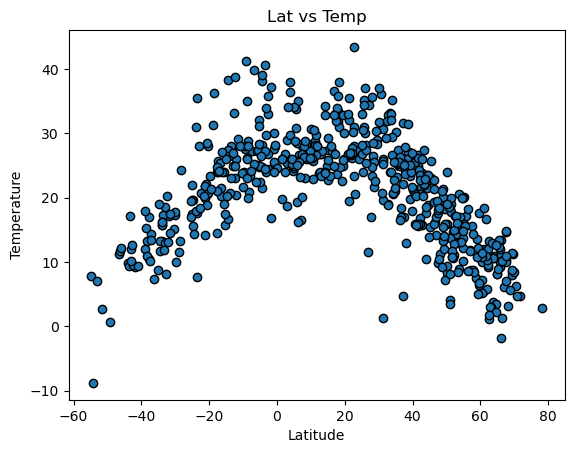

In [49]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(Latitude,temperature, edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Lat vs Temp')


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

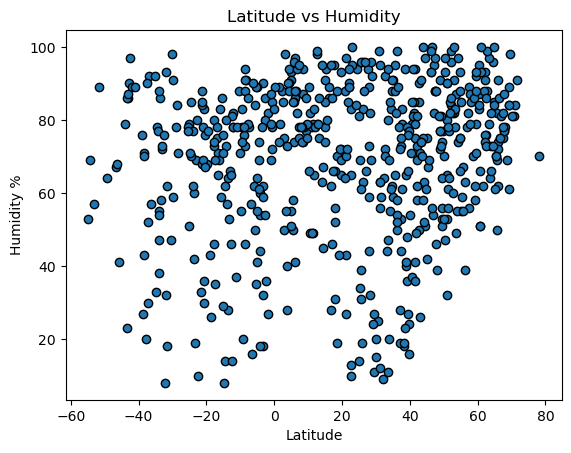

In [50]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(Latitude, Humidity, edgecolors='black')


# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Latitude vs Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

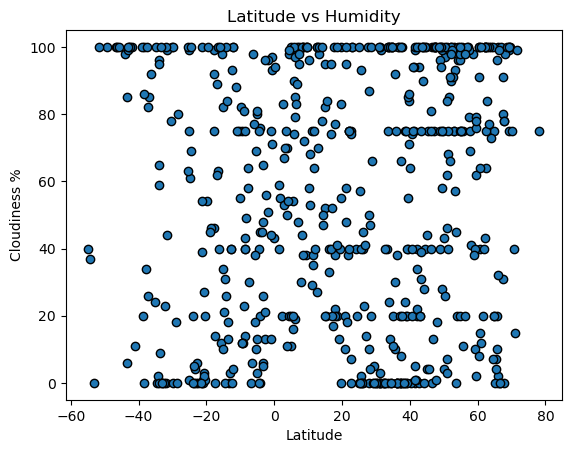

In [51]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(Latitude, Cloudiness, edgecolors='black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Latitude vs Humidity')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

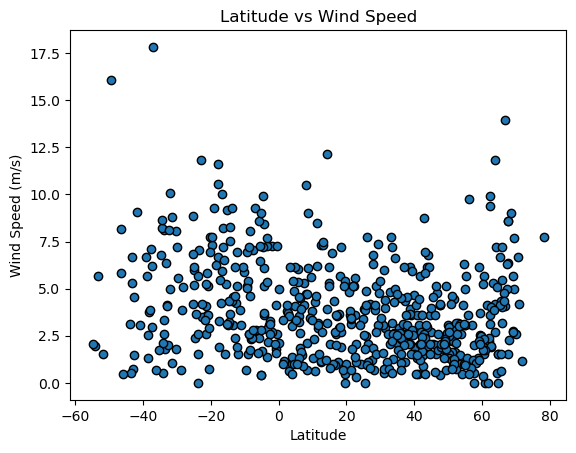

In [52]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(Latitude, Wind_Speed, edgecolors='black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs Wind Speed')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
slope_, int_, r_, p_, stand_err = stats.linregress(x_axis, y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE passing_math_count = school_data_complete[(school_data_complete["math_score"] >= 70)]
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,gadzhiyevo,69.2551,33.3362,8.44,84,99,2.73,RU,1694629583
3,san andres ixtlan,19.8167,-103.4667,25.99,65,83,1.03,MX,1694629583
4,isafjordur,66.0755,-23.1240,10.02,62,0,4.12,IS,1694629583
5,sirjan,29.4520,55.6814,28.91,11,5,7.39,IR,1694629583
6,howrah,22.5892,88.3103,28.00,83,75,3.60,IN,1694629583


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tanjung pandan,-2.7500,107.6500,24.46,86,13,3.06,ID,1694629582
1,codrington,-38.2667,141.9667,13.34,71,100,3.76,AU,1694629583
7,edinburgh of the seven seas,-37.0676,-12.3116,14.31,92,85,17.82,SH,1694629583
13,waitangi,-43.9535,-176.5597,9.90,79,98,3.13,NZ,1694629584
14,puerto ayora,-0.7393,-90.3518,29.98,85,97,1.79,EC,1694629584


In [ ]:
x_values = san_diego_housing['AveRooms']
y_values = san_diego_housing['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($100,000)')
plt.show()

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5903454556035008


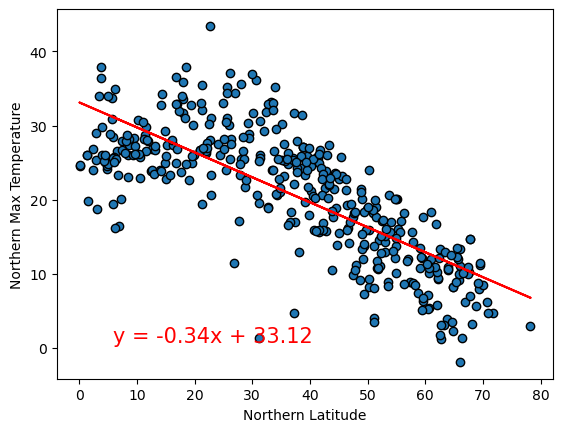

In [39]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Northern Max Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6358257218514166


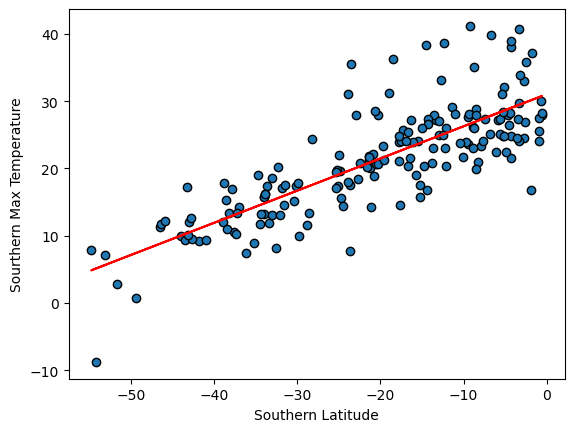

In [41]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE  .33x + 28.8
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Sourthern Max Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The linear relationship of both of these graphs is decent with r_values of .64 and .59. Both of these graphs are showing a clear correlation that the temperature decreases further from equator (latitude 0), and the temperature is at its highest near the equator(latitude 0).

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.003847245102519208


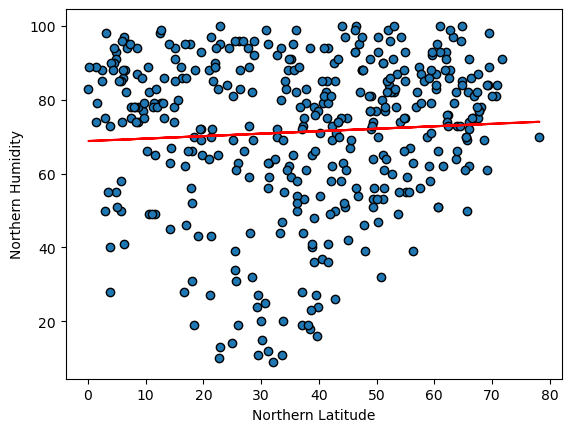

In [42]:
# Northern Hemisphere
# YOUR CODE HERE
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Northern Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0007479071154177409


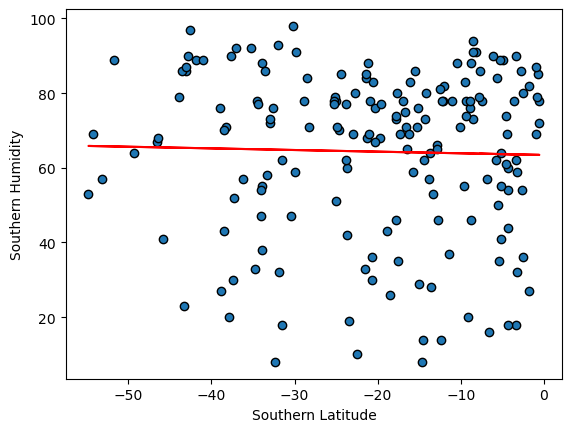

In [43]:
# Southern Hemisphere
# YOUR CODE HERE
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Southern Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The r-values of both of these graphs is very low (.004 and .0007), so there is nothing statistically significant to conclude about this data. Looking at the graphs and the slopes, it is clear that himidity is slighly higher away from the equator and lower near the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0032919045020327526


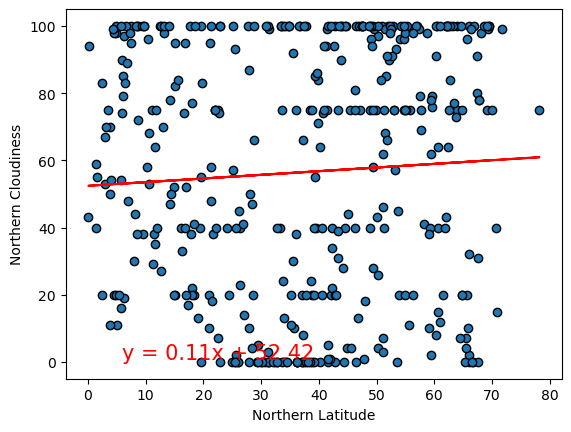

In [44]:
# Northern Hemisphere
# YOUR CODE HERE
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Northern Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.023905494992823753


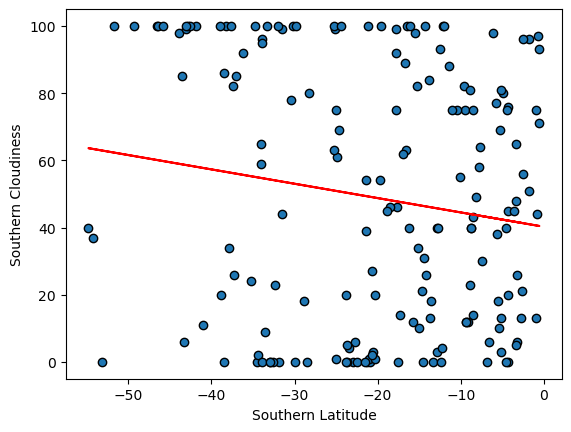

In [45]:
# Southern Hemisphere
# YOUR CODE HERE
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Southern Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The r-values on these graphs are also low (.003 and .02), so there is nothing statistically significant to say about these graphs either. Looking at the graphs  and slopes, there is slighly higher cloudiness further way from the equator, and there is less cloudiness near the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00012456604699566216


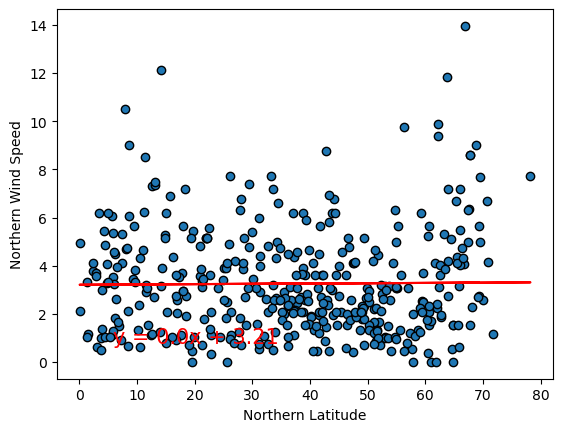

In [47]:
# Northern Hemisphere
# YOUR CODE HERE
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Northern Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0015436534806055793


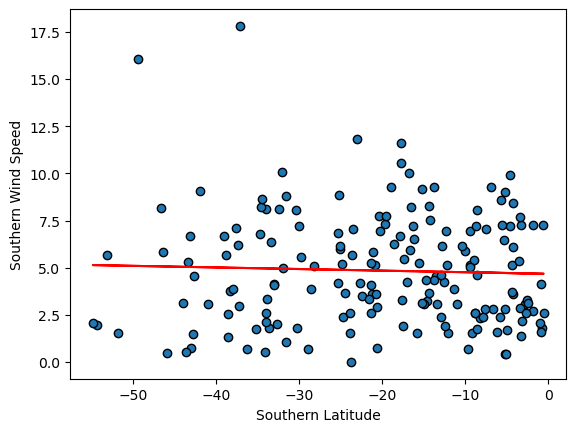

In [48]:
# Southern Hemisphere
# YOUR CODE HERE
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Southern Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The r-squared values of these graphs are both low (.0001, .002), so there is nothing statistically significant to conclude. Looking at the graphs and the slopes, there really seems to be no correlation between latitude and Wind Speeds. 